In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras

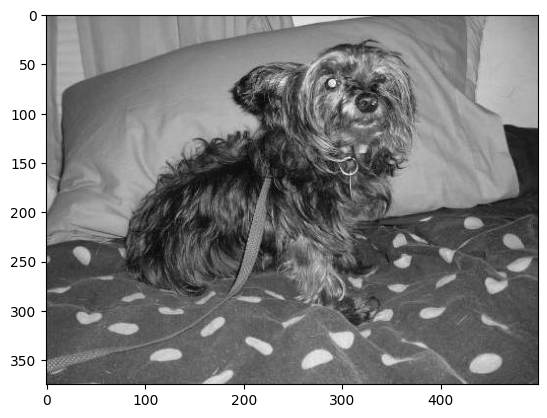

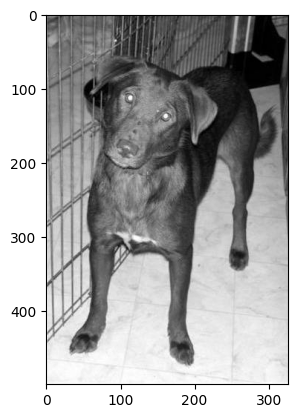

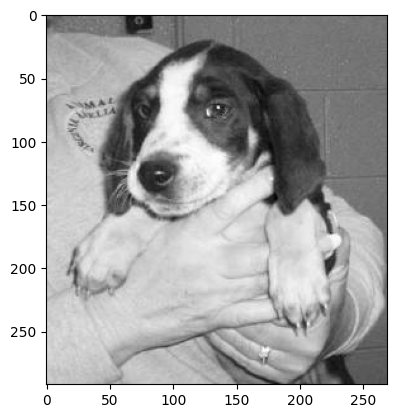

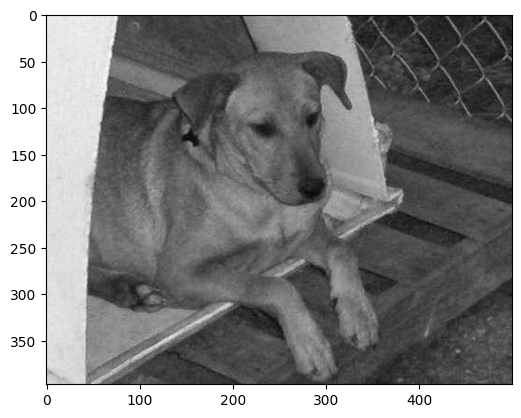

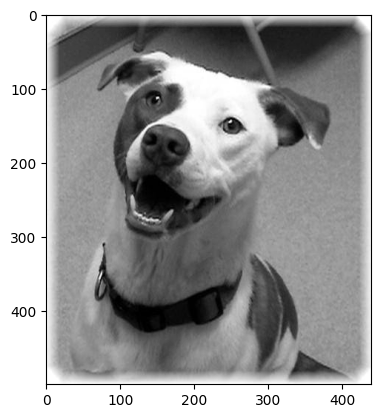

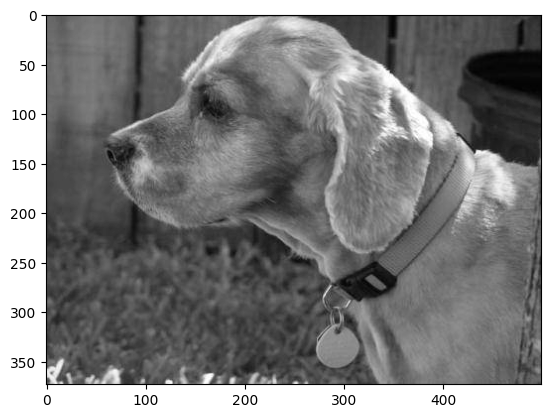

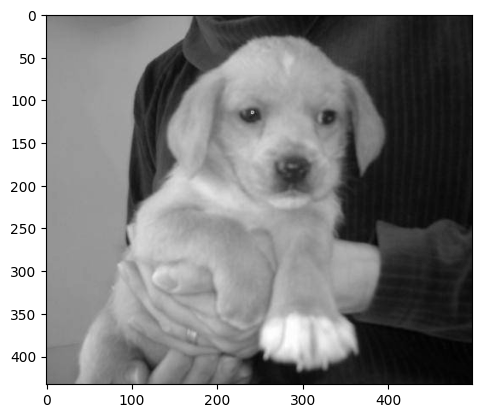

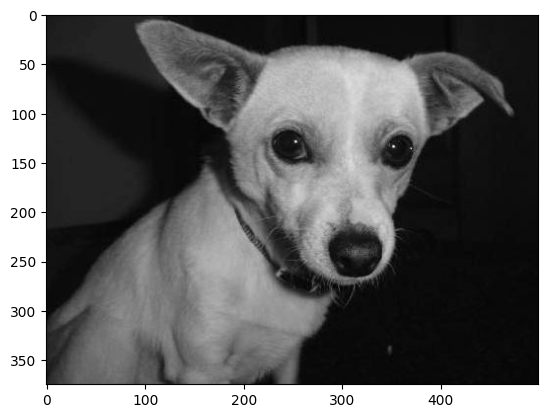

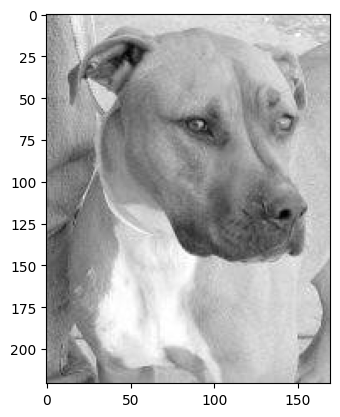

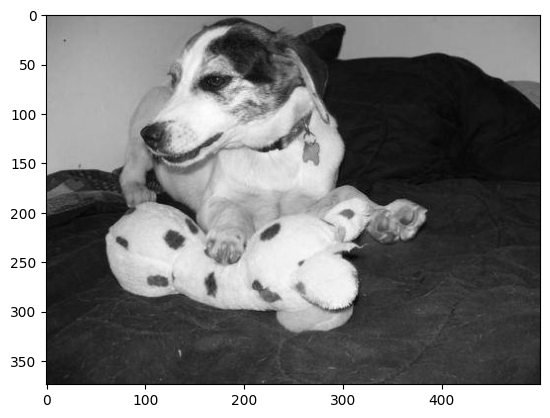

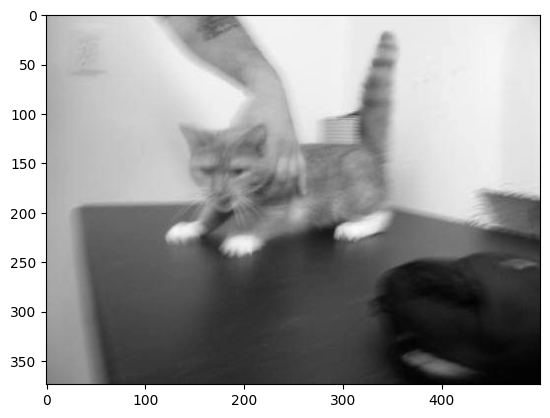

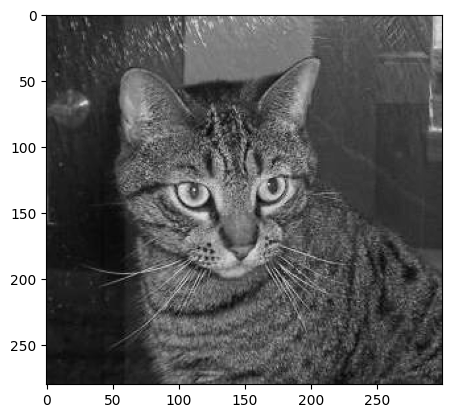

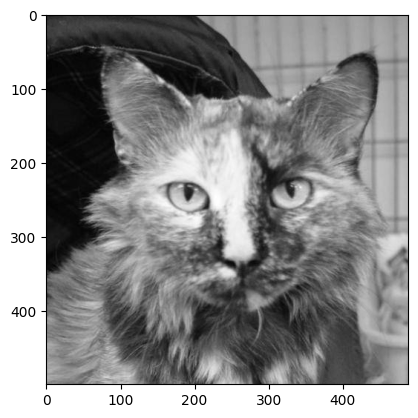

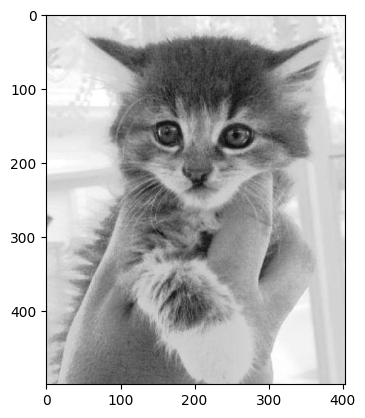

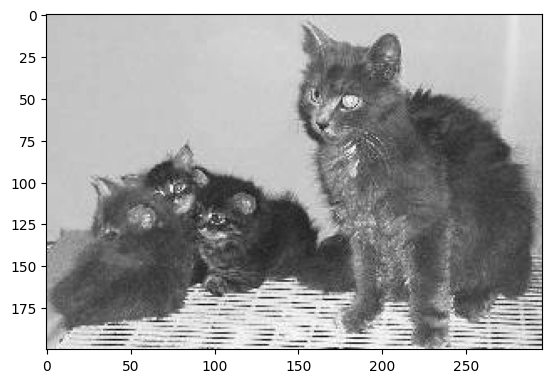

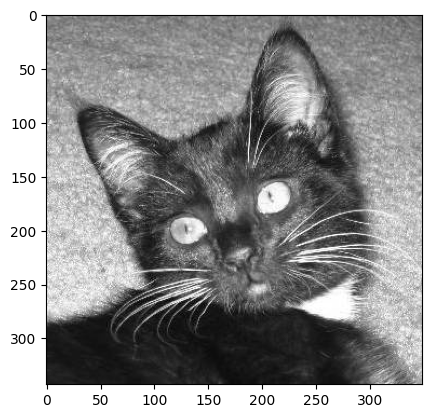

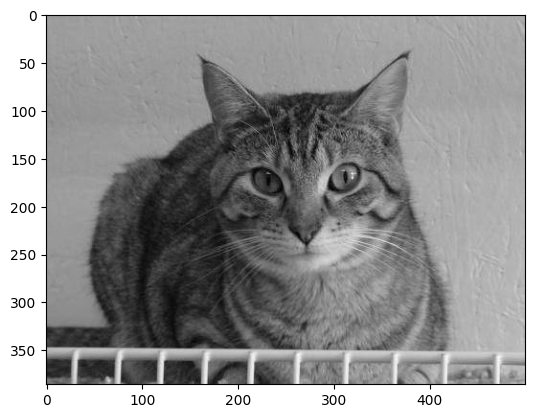

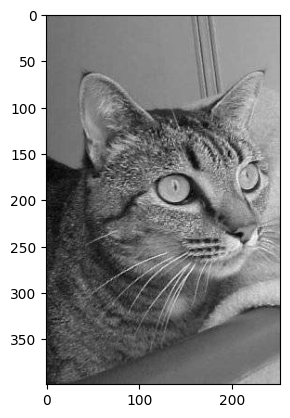

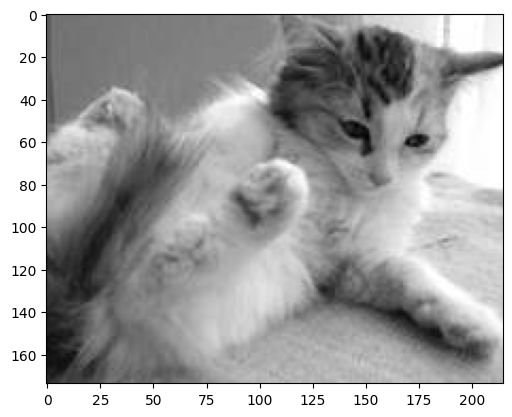

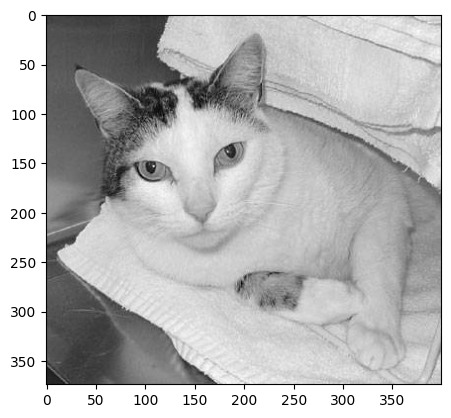

In [39]:
DATADIR = 'PetImages'
CATEGORIES = ["Dog", "Cat"]
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    x=0
    for img in os.listdir(path):
        x+=1
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
        plt. imshow(img_array, cmap='gray')
        plt.show()
        if x == 10:
            break

In [40]:
print(img_array)
print(img_array.shape)

[[ 57  58  59 ... 194 193 192]
 [ 57  59  60 ... 192 191 190]
 [ 57  59  60 ... 190 189 188]
 ...
 [ 37  37  36 ... 181 179 174]
 [ 37  37  36 ... 175 174 170]
 [ 37  37  36 ... 174 175 172]]
(374, 400)


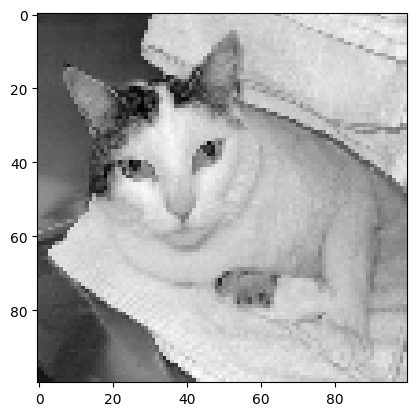

In [41]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [42]:
training_data = []
def create_training_data():
    for category in CATEGORIES: # do dogs and cats

        path = os.path. join(DATADIR, category) # create path to dogs and cats P
        class_num = CATEGORIES. index(category) # get the classification (0 or

        for img in tqdm(os.listdir(path)): # iterate over each image per dogs a.
            try:
                img_array = cv2.imread(os.path. join(path, img) ,cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data. append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

100%|██████████| 500/500 [00:00<00:00, 1760.13it/s]


In [43]:
print(training_data[0])

[array([[119, 109, 152, ..., 141, 138, 135],
       [124, 114, 148, ..., 149, 144, 137],
       [126, 117, 154, ..., 151, 149, 143],
       ...,
       [ 72,  92,  84, ...,  71,  67,  68],
       [ 82,  70,  86, ...,  70,  74,  73],
       [ 74,  72,  78, ...,  69,  88,  75]], dtype=uint8), 0]


In [44]:
import random
random.shuffle(training_data)
for smaple in training_data[:10]:
    print(smaple[1])

1
1
0
1
1
0
0
1
1
0


In [45]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE)
y= np.array(y)

In [46]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 100, 100)
(200, 100, 100)
(800,)
(200,)


In [48]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(IMG_SIZE,IMG_SIZE)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

C:\Users\Computec\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [50]:
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5222 - loss: 173.8911
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5264 - loss: 176.0005
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5123 - loss: 76.1705
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.4769 - loss: 24.6498
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.4804 - loss: 13.2711
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.5172 - loss: 10.8221
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.5286 - loss: 8.5208
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.5030 - loss: 10.9266
Epoch 9/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6098 - loss: 2.5358
Epoch 10/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.5400 - loss: 3.3879
Epoch 11/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.5225 - loss: 5.7366
Epoch 12/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - 

In [51]:
test_loss, tes_acc = model.evaluate(X, y)
tes_acc

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7989 - loss: 0.4560


0.7860000133514404

In [52]:
import numpy as np
output = model.predict(X_test)
y_pred = np.argmax(output, axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.60      0.57      0.58       104
           1       0.56      0.59      0.58        96

    accuracy                           0.58       200
   macro avg       0.58      0.58      0.58       200
weighted avg       0.58      0.58      0.58       200



In [54]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[59 39]
 [45 57]]


In [55]:
model.save('model.h5')